In [19]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np

import pylab as pl
from sklearn import svm
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc
random_state = np.random.RandomState(0)



filename = 'pima-indians-diabetes-2.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, header = 1, names=names)

array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.50, random_state=1)
classifier1 = LogisticRegression()
classifier2 = svm.SVC(kernel='linear', probability=True)
probas1_ = classifier1.fit(X_train, y_train).predict_proba(X_test)
probas2_ = classifier2.fit(X_train, y_train).predict_proba(X_test)

/Users/barindersingh/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [21]:
# Compute ROC curve and area the curve for logistic
fpr1, tpr1, thresholds1 = roc_curve(y_test, probas1_[:, 1])
roc_auc1 = auc(fpr1, tpr1)
print("Area under the ROC curve : %f" % roc_auc1)

Area under the ROC curve : 0.816936


In [22]:
# Compute ROC curve and area the curve
fpr2, tpr2, thresholds2 = roc_curve(y_test, probas2_[:, 1])
roc_auc2 = auc(fpr2, tpr2)
print("Area under the ROC curve : %f" % roc_auc2)

Area under the ROC curve : 0.832070


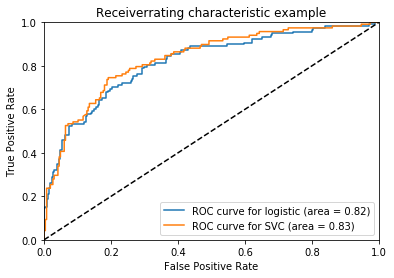

In [23]:
# Plot the ROC

# Plot ROC curve
pl.clf()
pl.plot(fpr1, tpr1, label='ROC curve for logistic (area = %0.2f)' % roc_auc1)
pl.plot(fpr2, tpr2, label='ROC curve for SVC (area = %0.2f)' % roc_auc2)
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiverrating characteristic example')
pl.legend(loc="lower right")
pl.show()

In [24]:
import pandas as pd

i = np.arange(len(tpr1)) # index for df
roc1 = pd.DataFrame({'fpr1' : pd.Series(fpr1, index=i),'tpr1' : pd.Series(tpr1, index = i), '1-fpr1' : pd.Series(1-fpr1, index = i), 'tf1' : pd.Series(tpr1 - (1-fpr1), index = i), 'thresholds1' : pd.Series(thresholds1, index = i)})
print(roc1.loc[(roc1.tf1-0).abs().argsort()[:1]])

i = np.arange(len(tpr2)) # index for df
roc2 = pd.DataFrame({'fpr2' : pd.Series(fpr2, index=i),'tpr2' : pd.Series(tpr2, index = i), '1-fpr2' : pd.Series(1-fpr2, index = i), 'tf2' : pd.Series(tpr2 - (1-fpr2), index = i), 'thresholds2' : pd.Series(thresholds2, index = i)})
print(roc2.loc[(roc2.tf2-0).abs().argsort()[:1]])

        fpr1      tpr1    1-fpr1       tf1  thresholds1
68  0.263158  0.737288  0.736842  0.000446     0.370837
        fpr2      tpr2    1-fpr2       tf2  thresholds2
55  0.233083  0.762712  0.766917 -0.004205     0.365347


In [25]:
roc1.head(71)

,fpr1,tpr1,1-fpr1,tf1,thresholds1
0,0.000000,0.000000,1.000000,-1.000000,1.954770
1,0.000000,0.008475,1.000000,-0.991525,0.954770
2,0.000000,0.144068,1.000000,-0.855932,0.793966
3,0.003759,0.144068,0.996241,-0.852173,0.790207
4,0.003759,0.152542,0.996241,-0.843698,0.786714
5,0.007519,0.152542,0.992481,-0.839939,0.777518
6,0.007519,0.186441,0.992481,-0.806041,0.748885
7,0.011278,0.186441,0.988722,-0.802281,0.747613
8,0.011278,0.211864,0.988722,-0.776857,0.734631
9,0.015038,0.211864,0.984962,-0.773098,0.730442


In [26]:
roc2.head(71)

,fpr2,tpr2,1-fpr2,tf2,thresholds2
0,0.000000,0.000000,1.000000,-1.000000,1.960200
1,0.000000,0.008475,1.000000,-0.991525,0.960200
2,0.000000,0.042373,1.000000,-0.957627,0.919927
3,0.003759,0.042373,0.996241,-0.953868,0.908468
4,0.003759,0.093220,0.996241,-0.903020,0.874161
5,0.007519,0.093220,0.992481,-0.899261,0.871692
6,0.007519,0.237288,0.992481,-0.755193,0.782573
7,0.018797,0.237288,0.981203,-0.743915,0.771113
8,0.018797,0.254237,0.981203,-0.726966,0.766562
9,0.026316,0.254237,0.973684,-0.719447,0.756939
